In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
spy_data = yf.download(['SPY'], '2021-01-01', '2022-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
spy_close = spy_data[['Adj Close']]
spy_close['shifted_close'] = spy_close['Adj Close'].shift(1)
spy_close

/var/folders/d7/91dqyhp52fb8zsybsj849cyw0000gn/T/ipykernel_75567/693229522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy_close['shifted_close'] = spy_close['Adj Close'].shift(1)


,Adj Close,shifted_close
Date,,
2021-01-04,359.773285,NaN
2021-01-05,362.251129,359.773285
2021-01-06,364.416870,362.251129
2021-01-07,369.831207,364.416870
2021-01-08,371.938416,369.831207
...,...,...
2021-12-27,471.797455,465.213684
2021-12-28,471.411896,471.797455
2021-12-29,472.014954,471.411896


In [4]:
spy_returns = (spy_close['Adj Close'] - spy_close['shifted_close'])/(spy_close['shifted_close'])
spy_returns = spy_returns.iloc[1::]
spy_returns

Date
2021-01-05    0.006887
2021-01-06    0.005979
2021-01-07    0.014858
2021-01-08    0.005698
2021-01-11   -0.006741
                ...   
2021-12-27    0.014152
2021-12-28   -0.000817
2021-12-29    0.001279
2021-12-30   -0.002765
2021-12-31   -0.002520
Length: 251, dtype: float64

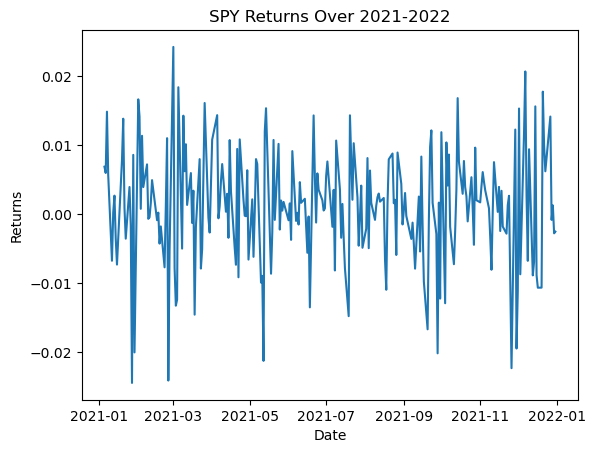

In [5]:
plt.plot(spy_returns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('SPY Returns Over 2021-2022')
plt.show()

# For Section on Volatility (Black-Scholes vs. Monte Carlo)

In [6]:
data = spy_returns.iloc[len(spy_returns)-10::]
data

Date
2021-12-17   -0.010643
2021-12-20   -0.010633
2021-12-21    0.017759
2021-12-22    0.009999
2021-12-23    0.006222
2021-12-27    0.014152
2021-12-28   -0.000817
2021-12-29    0.001279
2021-12-30   -0.002765
2021-12-31   -0.002520
dtype: float64

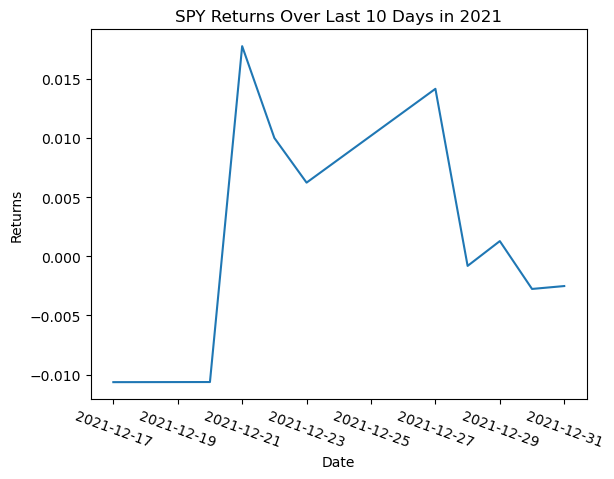

In [7]:
plt.plot(data)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('SPY Returns Over Last 10 Days in 2021')
plt.xticks(rotation=340)
plt.show()

In [8]:
# Calculation of return mean
mu_bar = 1/len(data) * data.sum()
mu_bar

0.002203295899786473

In [9]:
# Calculation of $\sigma$
sigma = (((data - mu_bar)**2).sum()/len(data))**(1/2)
sigma

0.009211117516866697

In [10]:
# Convert to yearly volatility
y_sigma = sigma*252**(1/2)
y_sigma

0.14622195747972047

# Monte Carlo Simulation
(Nick: I'm going to code the monte carlo simulation since my part depends on this, so feel free to use this code in your part)


Example Application: Suppose the current price of an asset was $90.53 and in 60 trading days, a call option will expire with a strike of 100. Given that the volatility of the asset is .05, the drift is .1 and the risk-free rate is 0.037, use a Monte Carlo simulation to simulate the price of the option, then compare with the Black-Scholes equation.

In [11]:
def monte_carlo_pricer(N,trading_days_until_exp, sigma, k, r, s): 
    """
    N - Number of simulations
    trading_days_until_exp - Number of trading days
    sigma - Annualized volatility
    k - Strike price
    r - Nominal rate per period t
    s - Current spot price of underlying asset
    
    """
    prices = [np.array([s for _ in range(N)])]
    delta_t = 1/252
    for day in range(int(trading_days_until_exp)):
        # Generate a random number ~ N(0,1) for each simulation
        random_nums = np.random.randn(N)

        # Perform vectorized update based on the random numbers
        prices.append(prices[-1]*np.e**((r-(sigma**2)/2)*(delta_t)+sigma*random_nums*delta_t**(1/2)))
    
    plt.figure()
    plt.plot(prices)
    plt.show()
    
    # Calculate the price of the option
    yum = trading_days_until_exp/252 # Years Until Maturity
    call_option_price = np.e**(-r*yum)*(np.maximum(prices[-1] - k, np.zeros(len(prices[-1])))).mean()
    put_option_price = np.e**(-r*yum)*(np.maximum(k-prices[-1], np.zeros(len(prices[-1])))).mean()
    return {'call':call_option_price, 'put':put_option_price, 'prices':prices}


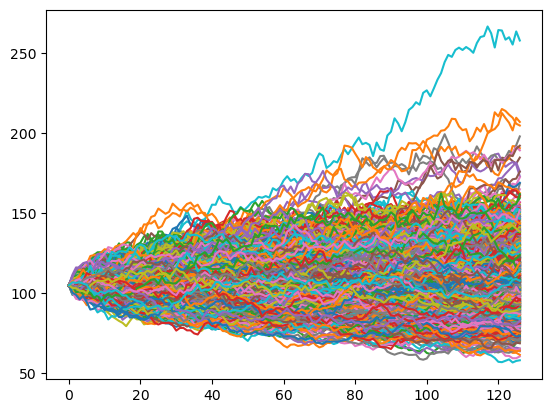

The calculated call option price is 13.152004594167646. The calculated put option price is 4.02426945571226.


In [12]:
res = monte_carlo_pricer(N=1000,trading_days_until_exp=252/2, sigma=0.3, k=100, r=0.1, s=105)
print(f"The calculated call option price is {res['call']}. The calculated put option price is {res['put']}.")

In [13]:
"""
Uncomment this code to run - it takes a long time.

Creates a graph of the price estimate by num simulations
"""
# simulated_prices = []
# for i in range(5, 10000, 100):
#     simulated_prices.append(monte_carlo_pricer(N=5000,trading_days_until_exp=252/2, sigma=0.3, k=100, r=0.1, s=105))

# plt.figure()
# plt.plot([x['call'] for x in simulated_prices])
# plt.title("Price Estimates of Monte Carlo Simulation by Number of Simulations")
# plt.show()

'\nUncomment this code to run - it takes a long time.\n\nCreates a graph of the price estimate by num simulations\n'

In [14]:
z = np.array([[.1, .2, .4, .6, .8],[.15, .27, .43, .64, .88], [.25, .37, .53, .74, .98]]).flatten()
t = [0, .25, .5, .75, 1]
s = [0.5, 1, 1.5]
x = [strike for strike in s for _ in t]
y = [time for _ in s for time in t]
print(x)
print(y)

[0.5, 0.5, 0.5, 0.5, 0.5, 1, 1, 1, 1, 1, 1.5, 1.5, 1.5, 1.5, 1.5]
[0, 0.25, 0.5, 0.75, 1, 0, 0.25, 0.5, 0.75, 1, 0, 0.25, 0.5, 0.75, 1]


In [15]:
from scipy.interpolate import interp2d

In [16]:
surface_interp = interp2d(x,y,z)
surface_interp(x=0.8,y=0.5)

/usr/local/anaconda3/envs/main/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=6,6 m=15 fp=0.000300 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


array([0.2587112])

# Monte Carlo with Variable Volatility

In [17]:
def monte_carlo_pricer(N,trading_days_until_exp, 
                       volatility_surface, k, r, s): 
    """
    N - Number of simulations
    trading_days_until_exp - Number of trading days
    volatility_surface - Scipy output of interp2d
    k - Strike price
    r - Nominal rate per period t
    s - Current spot price of underlying asset
    
    """
    prices = [np.array([s for _ in range(N)])]
    delta_t = 1/252
    for day in range(int(trading_days_until_exp)):
        # Calculate implied volatility
        sigma = volatility_surface(
            k/s, trading_days_until_exp*delta_t)
        
        # Generate a random number ~ N(0,1) for each simulation
        random_nums = np.random.randn(N)

        # Perform vectorized update based on the random numbers
        prices.append(
            prices[-1]*np.e**((r-(sigma**2)/2)*(delta_t)+
                              sigma*random_nums*delta_t**(1/2)))
    
    plt.figure()
    plt.plot(prices)
    plt.show()
    
    # Calculate the price of the option
    yum = trading_days_until_exp/252 # Years Until Maturity
    call_option_price = np.e**(-r*yum)*(
        np.maximum(
            prices[-1] - k, np.zeros(len(prices[-1])))).mean()
    put_option_price = np.e**(-r*yum)*(
        np.maximum(k-prices[-1], np.zeros(len(prices[-1])))).mean()
    return {'call':call_option_price, 
            'put':put_option_price, 'prices':prices}


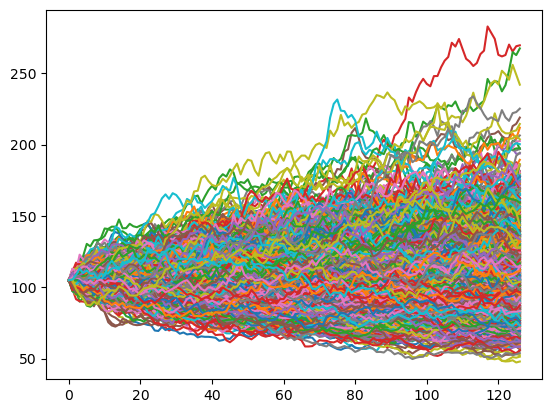

The calculated call option price is 16.642291003238732. The calculated put option price is 6.645084827368065.


In [18]:
res = monte_carlo_pricer(N=1000,trading_days_until_exp=252/2, volatility_surface=surface_interp, k=100, r=0.1, s=105)
print(f"The calculated call option price is {res['call']}. The calculated put option price is {res['put']}.")

# Black Scholes Implementation

In [19]:
import sys
import scipy
from scipy.stats import norm as pnorm
import math

In [131]:
'''
This is a one-file command-line program that computes the Black-Scholes' no-arbitrage
cost of a call option for the given parameters:
s - the current price of the security
t - the time (as a fraction of a year) until the expiration
K - the strike price of the call
sigma - the volatility of the secruity
r - the continuously-compounded interest rate
'''

def black_scholes(s,t,K,sigma,r):
    print(r, t, sigma, K, s)
    w = (r*t + sigma**2*t/2 - math.log(K/s))/(sigma*t**(1/2))
    c = s*pnorm.cdf(w) - K*math.e**(-r*t)*pnorm.cdf(w-sigma*t**(1/2))
    print(f"w is {w}")
    print("The no-arbitrage cost of the call option is {}".format(c))
    print("The number of shares to sell for delta-hedging is {}".format(pnorm.cdf(w)))
    print("The risk-neutral probability of the call expiring in the money is {}\n\n".format(pnorm.cdf(w-sigma*t**(1/2))))

In [132]:
def calculate_implied_volatility(s,t,K,r, price_of_call, epsilon):
    sigma = 0
    price = -1
    errors = []
    prices = []
    while not abs(price - price_of_call) < epsilon:
        sigma += epsilon/2
        w = (r*t + sigma**2*t/2 - math.log(K/s))/(sigma*t**(1/2))
        price = s*pnorm.cdf(w) - K*math.e**(-r*t)*pnorm.cdf(w-sigma*t**(1/2))
        errors.append(abs(price - price_of_call)/abs(price_of_call))
        prices.append(price)
    
    print(f"The calculated implied volatility is {sigma}")
    return {"errors":errors, "prices":prices}

In [133]:
#black_scholes(50, .5, 50, 2.43895, .03)
black_scholes(50, .5, 50, 1.5, .03)

0.03 0.5 1.5 50 50
w is 0.5444722215136415
The no-arbitrage cost of the call option is 20.429458462808576
The number of shares to sell for delta-hedging is 0.7069417205470303
The risk-neutral probability of the call expiring in the money is 0.3028615726767822




The calculated implied volatility is 2.438999999999982


Text(0, 0.5, 'Price')

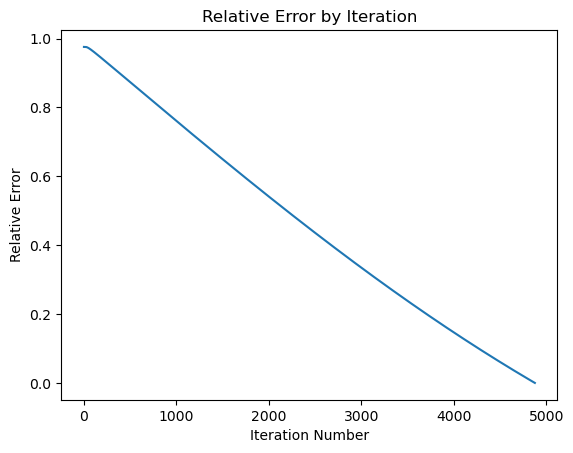

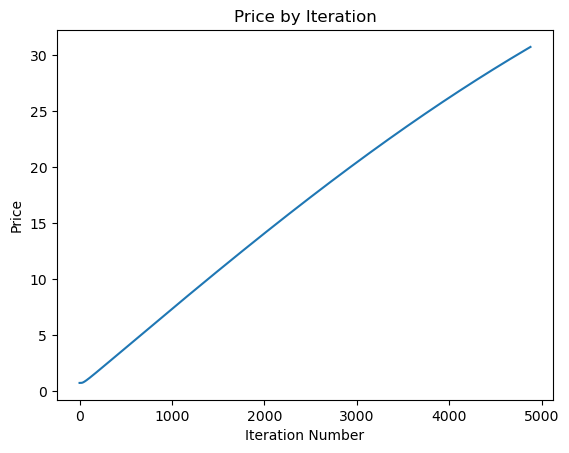

In [153]:
errors, prices = calculate_implied_volatility(50, .5, 50, .03, 30.71935033108691, 0.001).values()
plt.plot(errors)
plt.title("Relative Error by Iteration")
plt.xlabel("Iteration Number")
plt.ylabel("Relative Error")

plt.figure()
plt.plot(prices)
plt.title("Price by Iteration")
plt.xlabel("Iteration Number")
plt.ylabel("Price")

In [145]:
def calculate_implied_volatility_midpoint(s,t,K,r, price_of_call, epsilon, upper_bound):
    price = -1
    errors = []
    left = 0
    right = upper_bound
    while not left >= right:
        mid = (left+right)/2
        sigma = mid
        w = (r*t + sigma**2*t/2 - math.log(K/s))/(sigma*t**(1/2))
        price = s*pnorm.cdf(w) - K*math.e**(-r*t)*pnorm.cdf(w-sigma*t**(1/2))
        
        errors.append(abs(price - price_of_call)/abs(price_of_call))
        if abs(price - price_of_call) < epsilon:
            break
        elif price > price_of_call:
            right = mid
        else:
            left = mid
    return errors

In [150]:
errors = calculate_implied_volatility_midpoint(50, .5, 50, .03, 30.71935033108691, 0.001, 50)

The calculated implied volatility is 2.4389266967773438


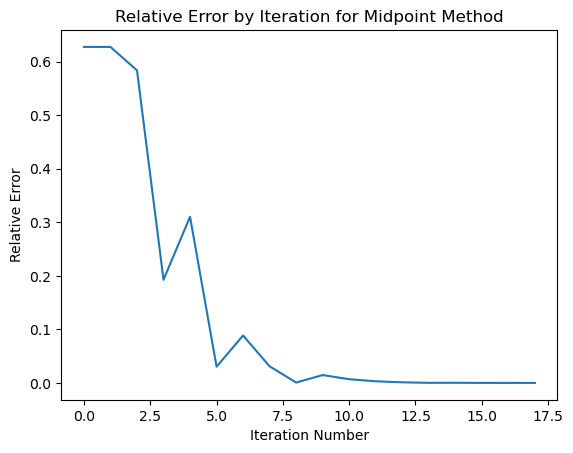

In [152]:
plt.figure()
plt.plot(errors)
plt.title("Relative Error by Iteration for Midpoint Method")
plt.xlabel("Iteration Number")
plt.ylabel("Relative Error")
plt.show()

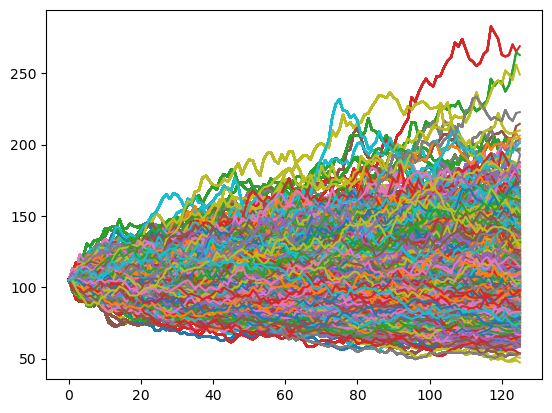

In [171]:
plt.figure()
for i in range(len(res['prices'])):
    plt.plot(np.array(res['prices'])[0:i,:])
    plt.savefig('./images/monte_carlo/img' + str(i))

In [172]:
import imageio
images = []
filenames = ['./images/monte_carlo/img'+ str(i) for i in range(len(res['prices']))]
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('/path/to/movie.gif', images, fps=15)

FileNotFoundError: No such file: '/Users/nickkarch/classes/amsc460/project/AMSC460-Final-Project/images/monte_carlo/img0'

In [174]:
import imageio
images = []
filenames = ['./images/monte_carlo/img'+ str(i) + ".png" for i in range(len(res['prices']))]
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('./images/movie.gif', images, fps=15)